In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_train = pd.read_csv('data_train.csv')
data_train.head()

,x_1,x_2,y
0,0.189645,-27.017739,0
1,0.692067,-9.033156,0
2,-1.003673,-30.560446,0
3,0.149332,-51.732407,0
4,0.132216,-13.741323,0


In [4]:
data_test = pd.DataFrame({"x_1": [0.5], "x_2": [29.0]})

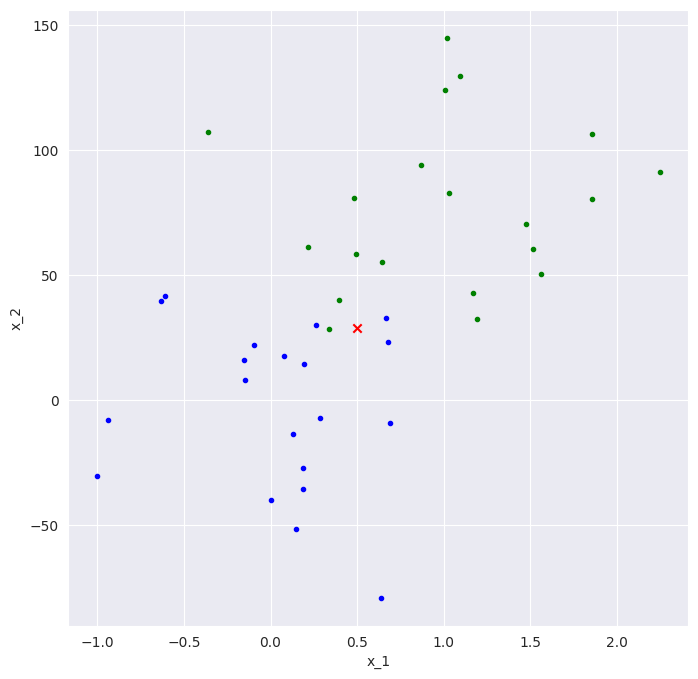

In [5]:
def draw_plow(data_train, data_test):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
    
    data_class_0 = data_train[data_train["y"] == 0]
    data_class_1 = data_train[data_train["y"] == 1]
    
    ax.scatter(data_class_0["x_1"], data_class_0["x_2"], c="b", marker=".")
    ax.scatter(data_class_1["x_1"], data_class_1["x_2"], c="g", marker=".")
    ax.scatter(data_test["x_1"], data_test["x_2"], c="r", marker="x")
    
    ax.set_xlabel("x_1")
    ax.set_ylabel("x_2")
    plt.show()
    
draw_plow(data_train, data_test)

In [21]:
def knn(x_train, y_train, x_test, k, distance_func, standardize):
    if standardize:
        mean_train = np.mean(x_train, axis=0)
        std_train = np.std(x_train, axis=0)

        x_train = (x_train - mean_train) / std_train
        x_test = (x_test - mean_train) / std_train
    
    # 1. Cari jarak tiap observasi ke target terdekat
    n = len(x_train)
    list_distances = np.zeros(n)
    
    for i in x_train.index:
        if distance_func == "euclidean":
            square_distance = (x_train["x_1"].loc[i] - x_test["x_1"]) ** 2 \
                              + (x_train["x_2"].loc[i] - x_test["x_2"]) ** 2
            distance = np.sqrt(square_distance)

        elif distance_func == "manhattan":
            distance = abs(x_train["x_1"].loc[i] - x_test["x_1"]) \
                       + abs(x_train["x_2"].loc[i] - x_test["x_2"])

        list_distances[i] = distance

    # 2. Cari "k" tetangga terdekat
    neighbors_index = list(np.argsort(list_distances)[:k])
    x_neighbors = x_train.loc[neighbors_index]
    y_neighbors = y_train.loc[neighbors_index]

    # 3. Buat hasil prediksi
    majority_vote = y_neighbors.value_counts(normalize=True)[0]
    
    return majority_vote, neighbors_index

In [22]:
y_test_predict, neighbor_index = knn(
    x_train=data_train[["x_1", "x_2"]],
    y_train=data_train["y"],
    x_test=data_test,
    distance_func="euclidean",
    k=5, standardize=True
)

data_test["y"] = y_test_predict
data_test

,x_1,x_2,y
0,0.5,29.0,0.6


In [8]:
data_train["x_1"].loc[neighbor_index]

20    0.337727
19    0.666686
28    0.396735
13    0.677644
8     0.263663
Name: x_1, dtype: float64

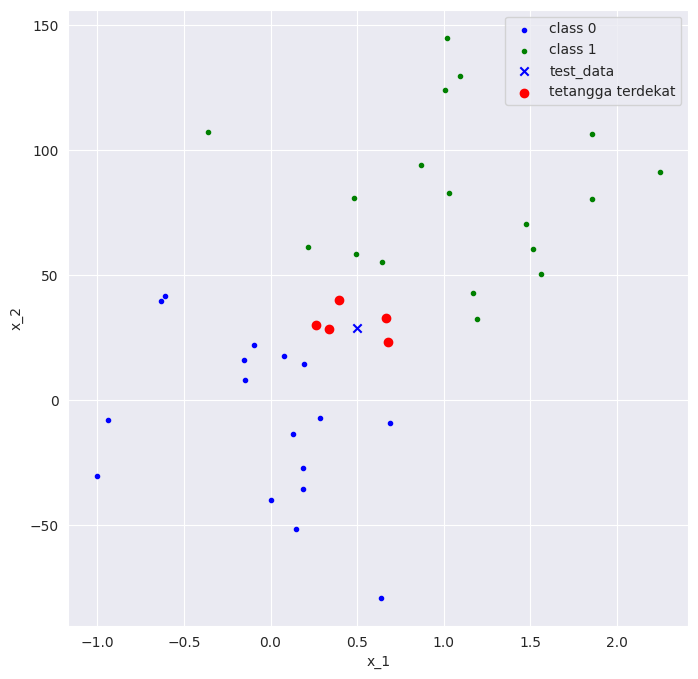

In [9]:
ig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

data_class_0 = data_train[data_train["y"] == 0]
data_class_1 = data_train[data_train["y"] == 1]

ax.scatter(data_class_0["x_1"], data_class_0["x_2"], c="b", marker=".", label="class 0")
ax.scatter(data_class_1["x_1"], data_class_1["x_2"], c="g", marker=".", label="class 1")

if data_test["y"][0] == 0:
    color_test = "b"
else:
    color_test = "g"

ax.scatter(data_test["x_1"], data_test["x_2"], c=color_test, marker="x", label="test_data")
ax.scatter(data_train["x_1"].loc[neighbor_index], 
           data_train["x_2"].loc[neighbor_index], 
           c="r", marker="o", label="tetangga terdekat")

ax.set_xlabel("x_1")
ax.set_ylabel("x_2")
plt.legend()
plt.show()

In [10]:
x = pd.DataFrame({"x": [1, 2, 3, 4, 5]})
x - 3

,x
0,-2
1,-1
2,0
3,1
4,2
